<h1><center>Exploratory Data Analysis </center></h1>

## Importing Modules 

In [1]:
#import important modules for eda
import os
import sys
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.display import Markdown, display, Image, display_html
from scipy.stats import skew

In [2]:
#ignore warnings
sns.set()
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.float_format', '{:.2f}'.format)

In [10]:
#import local modules
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from overview import Overview
from outlier import Outlier
import visualization as vz
from pre_process import Process
from cleaner import *

## Reading Data 

In [5]:
#creating processing object
process = Process()

In [7]:
# reading the csv file
df = pd.read_csv("../data/data.csv")
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,0.24,0.08,1.09,0.91,8.59,153.40,0.01,0.05,0.05,0.02,0.03,0.01,25.38,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12,NaN
1,842517,M,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,0.18,0.06,0.54,0.73,3.40,74.08,0.01,0.01,0.02,0.01,0.01,0.00,24.99,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09,NaN
2,84300903,M,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,0.21,0.06,0.75,0.79,4.58,94.03,0.01,0.04,0.04,0.02,0.02,0.00,23.57,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09,NaN
3,84348301,M,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,0.26,0.10,0.50,1.16,3.44,27.23,0.01,0.07,0.06,0.02,0.06,0.01,14.91,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17,NaN
4,84358402,M,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,0.18,0.06,0.76,0.78,5.44,94.44,0.01,0.02,0.06,0.02,0.02,0.01,22.54,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08,NaN


## General df Statistics

In [8]:
# size of df
df.size

18777

In [9]:
# shape of df
df.shape

(569, 33)

In [12]:
overview = Overview(df.drop(columns=['id']))
df_ = overview.getOverview()
vz.view_df(df_, ["unique_value_count", "count", "none_count"])

,label,count,none_count,none_percentage,unique_value_count,unique_percentage,dtype
0,DIAGNOSIS,569,0,0.0%,2,0.35%,object
1,SYMMETRY_WORST,569,0,0.0%,500,87.87%,float64
2,CONCAVE POINTS_WORST,569,0,0.0%,492,86.47%,float64
3,CONCAVITY_WORST,569,0,0.0%,539,94.73%,float64
4,COMPACTNESS_WORST,569,0,0.0%,529,92.97%,float64
5,SMOOTHNESS_WORST,569,0,0.0%,411,72.23%,float64
6,AREA_WORST,569,0,0.0%,544,95.61%,float64
7,PERIMETER_WORST,569,0,0.0%,514,90.33%,float64
8,TEXTURE_WORST,569,0,0.0%,511,89.81%,float64
9,RADIUS_WORST,569,0,0.0%,457,80.32%,float64


In [13]:
#dropping the unnamed:32 column without any values
drop_columns(df, ['Unnamed: 32'])


1 column was dropped.


## Data Types

In [14]:
#checking if there are columns with mixed data types
show_cols_mixed_dtypes(df)

None of the columns contain mixed types.


In [16]:
#calculating data statistical information for each column without id and diagnosis column(i.e categorical fetaure)
df_ = df.drop(columns=['id', 'diagnosis']).describe().T.reset_index().rename(columns={'index': 'labels'})
vz.view_df(df_, ['mean', 'min', '25%', '50%', '75%', 'max'])

,index,labels,count,mean,std,min,25%,50%,75%,max
0,0,radius_mean,569.000000,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.110000
1,1,texture_mean,569.000000,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.280000
2,2,perimeter_mean,569.000000,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.500000
3,3,area_mean,569.000000,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.000000
4,4,smoothness_mean,569.000000,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.163400
5,5,compactness_mean,569.000000,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.345400
6,6,concavity_mean,569.000000,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.426800
7,7,concave points_mean,569.000000,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.201200
8,8,symmetry_mean,569.000000,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.304000
9,9,fractal_dimension_mean,569.000000,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.097440


## Duplicates

In [17]:
# search for duplicate rows and drop them
drop_duplicates(df)

No duplicate rows were found.


## Saving Data

In [18]:
# save the clean dataframe to a csv file
df.to_csv('../data/data1.csv', index=False)

## Univariate Analysis

### a) Non graphical Univariate 

In [20]:
# diagnosis count for both diagnosis category where B- Benign and M- Malignant 
counts_df = df['diagnosis'].value_counts()
counts_df

B    357
M    212
Name: diagnosis, dtype: int64

### b) Graphical Univariate¶


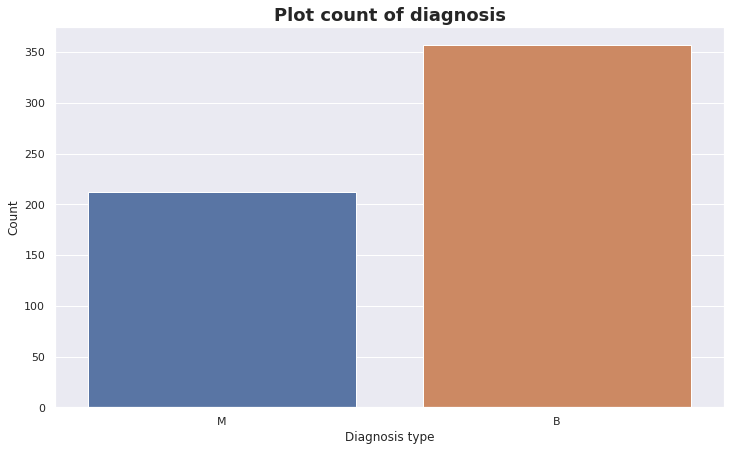

In [22]:
vz.plot_count(df, 'diagnosis', "Diagnosis type", "Count")